### Exploratory Data Analysis

#### 01 - Import dataset from RDS

In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rds import create_rds_engine, get_rds_instance
from env import AWS_PROFILE_NAME, RDS_DB_NAME, RDS_INSTANCE_NAME, RDS_PASSWORD, RDS_USER, DEFAULT_RDS_DB_TABLE

profile_name = AWS_PROFILE_NAME
master_username = RDS_USER
master_password = RDS_PASSWORD
db_name = RDS_DB_NAME
db_instance_identifier = RDS_INSTANCE_NAME
default_table = DEFAULT_RDS_DB_TABLE

boto_session = boto3.Session(profile_name=profile_name)

rds_client = boto_session.client("rds")

endpoint = get_rds_instance(rds_client, db_instance_identifier)

engine = create_rds_engine(master_username, master_password, endpoint, db_name)

query = f"SELECT * FROM `{default_table}`"

df = pd.read_sql(query, con=engine)

RDS Instance founded


#### 02 - Add necessary column label_avg_price_per_room in dataset for analyses

In [2]:
def generate_avg(avg_price_per_room: int):
    if avg_price_per_room <= 85:
        return 1
    elif avg_price_per_room < 115:
        return 2
    else:
        return 3

df["label_avg_price_per_room"] = df["avg_price_per_room"].apply(generate_avg)

#### 03 - Separe numeric columns of non numeric columns

In [3]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

numeric_df = df.drop(non_numeric_columns, axis=1)

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')


#### 04 - Dataset statistics

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,label_avg_price_per_room
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2


In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,label_avg_price_per_room
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,2.021309
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,0.790348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,1.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,3.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
label_avg_price_per_room                0
dtype: int64

#### 05 - Frequency analysis

In [8]:
common_value_percentages = {}

for column in df.columns:
    most_common_percentage = df[column].value_counts(normalize=True).iloc[0] * 100
    common_value_percentages[column] = most_common_percentage

sorted_columns = sorted(
    common_value_percentages.items(), key=lambda x: x[1], reverse=True
)

for column, percentage in sorted_columns:
    print(f"{column}: {percentage:.2f}%")

no_of_previous_cancellations: 99.07%
no_of_previous_bookings_not_canceled: 97.76%
repeated_guest: 97.44%
required_car_parking_space: 96.90%
no_of_children: 92.56%
arrival_year: 82.04%
room_type_reserved: 77.55%
type_of_meal_plan: 76.73%
no_of_adults: 71.97%
booking_status: 67.24%
market_segment_type: 63.99%
no_of_special_requests: 54.52%
no_of_weekend_nights: 46.51%
label_avg_price_per_room: 37.49%
no_of_week_nights: 31.55%
arrival_month: 14.66%
arrival_date: 3.74%
lead_time: 3.58%
avg_price_per_room: 2.34%
Booking_ID: 0.00%


#### 06 - Correlation analysis

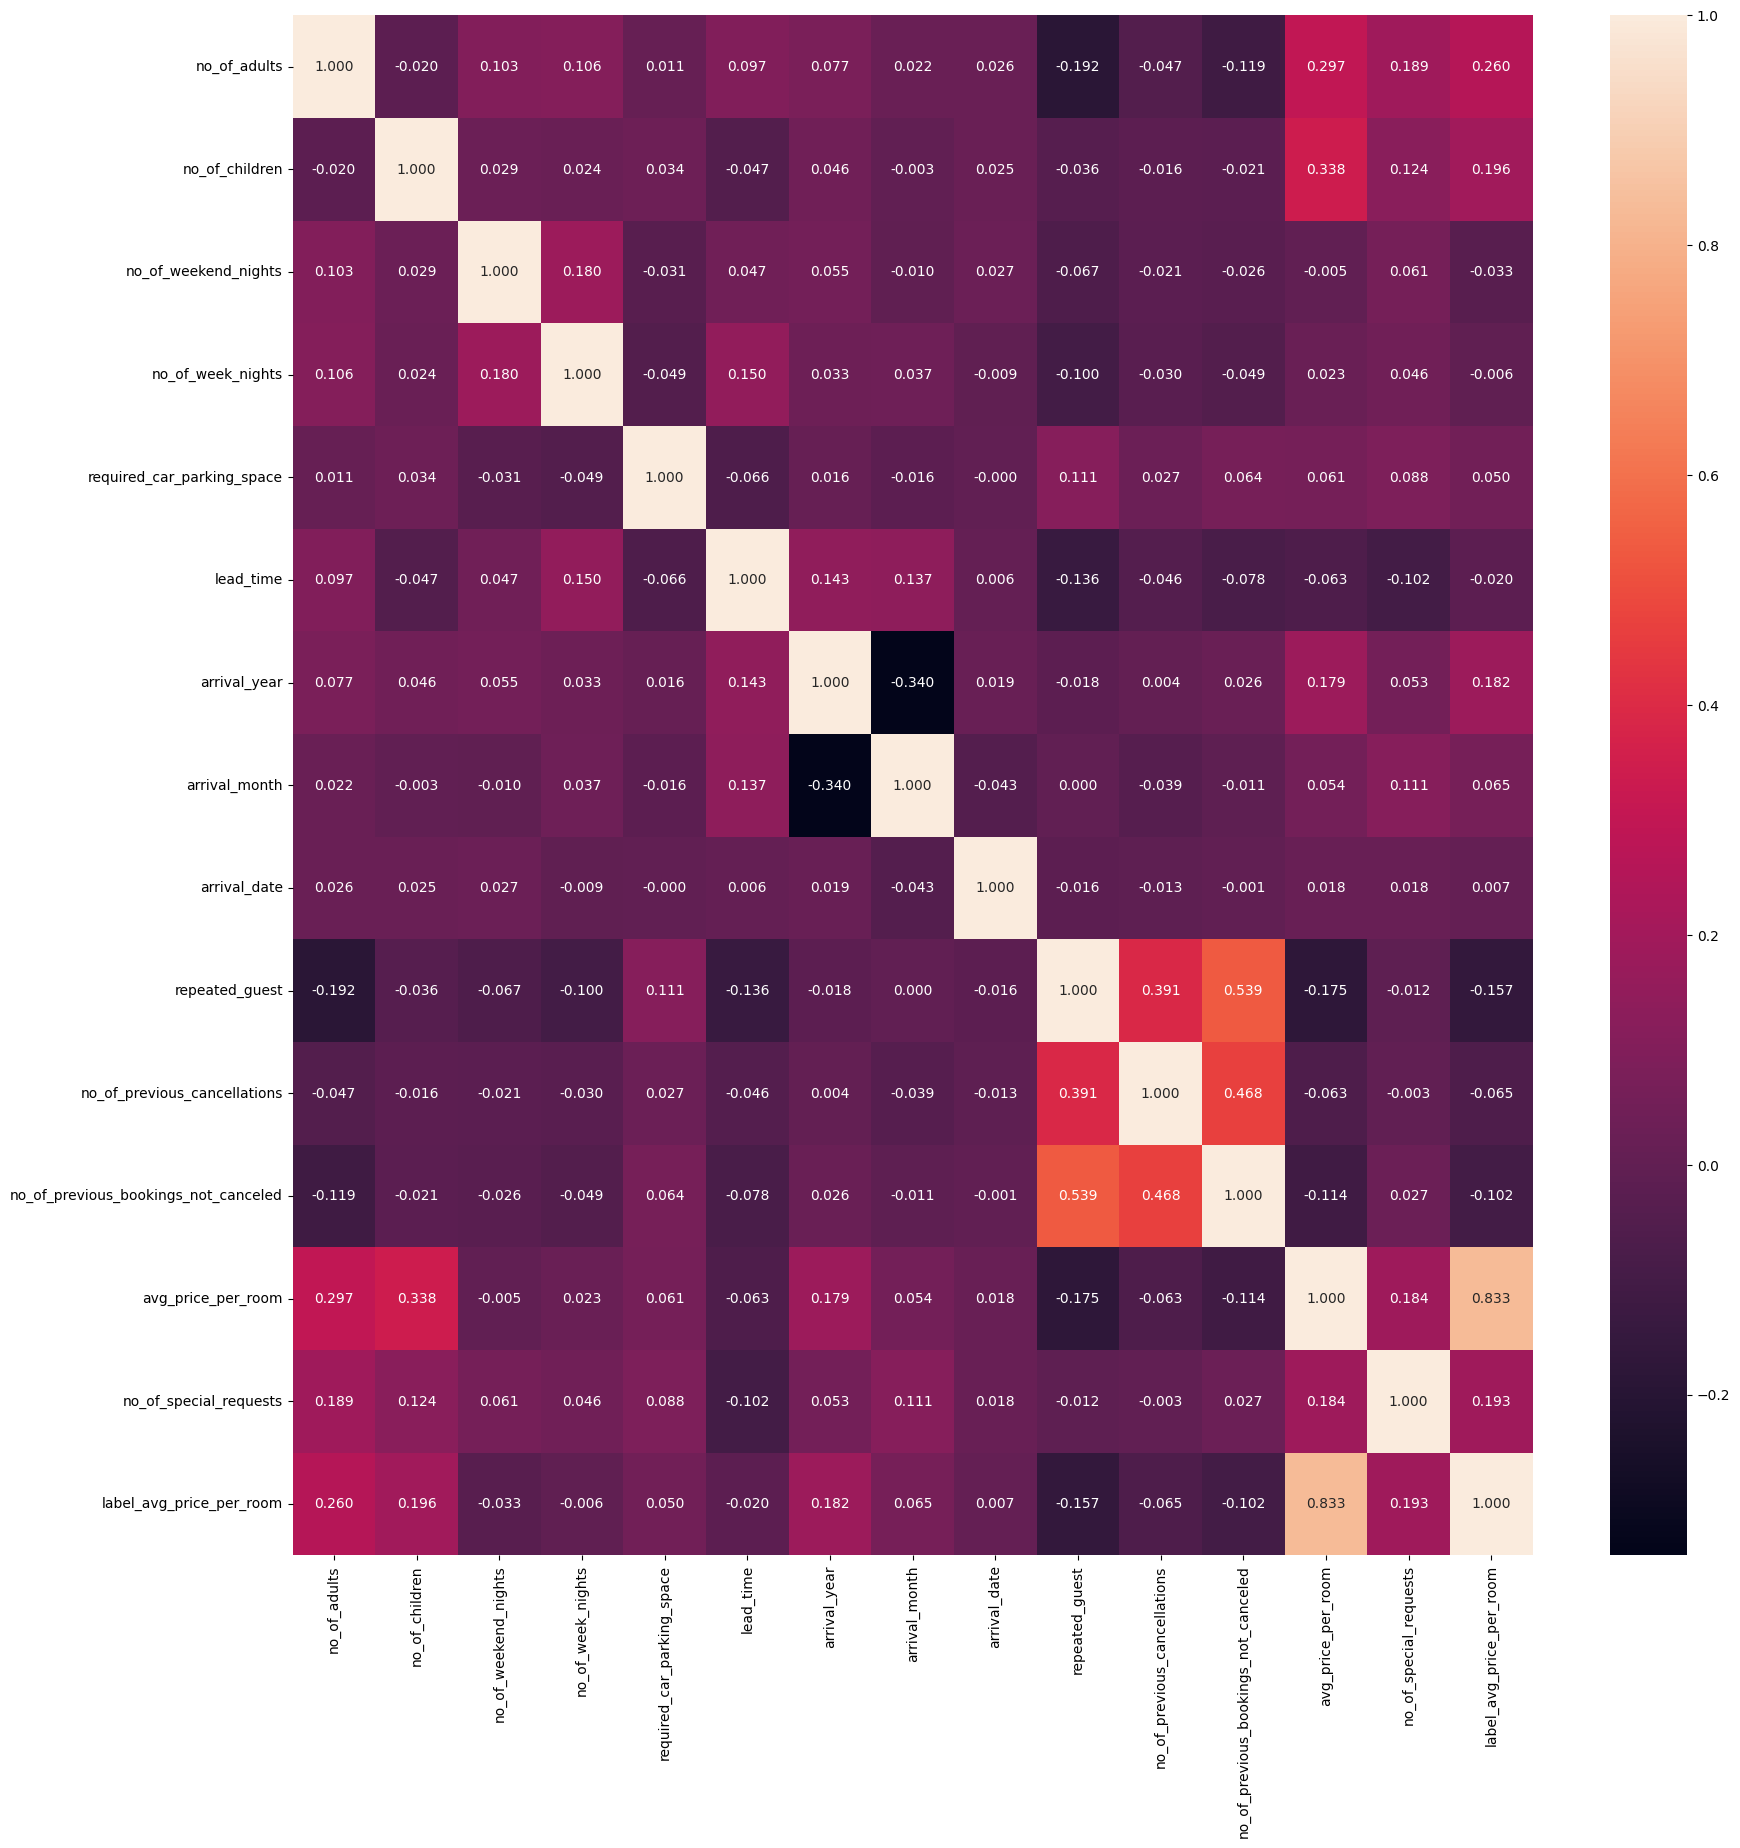

In [9]:
plt.figure(figsize=(20, 20))

sns.heatmap(numeric_df.corr(), annot=True, fmt=".3f")

plt.show()

#### 07 - Variance analysis

In [10]:
numeric_df.std()

no_of_adults                             0.518715
no_of_children                           0.402648
no_of_weekend_nights                     0.870644
no_of_week_nights                        1.410905
required_car_parking_space               0.173281
lead_time                               85.930817
arrival_year                             0.383836
arrival_month                            3.069894
arrival_date                             8.740447
repeated_guest                           0.158053
no_of_previous_cancellations             0.368331
no_of_previous_bookings_not_canceled     1.754171
avg_price_per_room                      35.089424
no_of_special_requests                   0.786236
label_avg_price_per_room                 0.790348
dtype: float64

In [11]:
numeric_df.var()

no_of_adults                               0.269065
no_of_children                             0.162125
no_of_weekend_nights                       0.758020
no_of_week_nights                          1.990653
required_car_parking_space                 0.030026
lead_time                               7384.105259
arrival_year                               0.147330
arrival_month                              9.424252
arrival_date                              76.395420
repeated_guest                             0.024981
no_of_previous_cancellations               0.135668
no_of_previous_bookings_not_canceled       3.077115
avg_price_per_room                      1231.267679
no_of_special_requests                     0.618167
label_avg_price_per_room                   0.624649
dtype: float64